In [14]:
from math import *
import numpy as np

def traverse(node,string=''):
    if isinstance(node, bin_tree):
        node=node.get_root()  
        # if unary
    if node.num_children == 1:
        string += (node.op)
        if node.coeff == None:
            string += ('('+traverse(node.left)+')')
        else:    
            string += ('('+str(node.coeff)+'*'+traverse(node.left)+')')
    # if binary
    elif node.num_children==2:
        string += '('+traverse(node.left)
        string += node.op
        string += traverse(node.right)+')'
    
    # if leaf node
    else:    
        if node.coeff == None:
            string += str(node.value)
        # if constant leaf node, will only have coefficient
        elif node.value == None:
            string += str(node.coeff)
        else:
            string += '('+str(node.coeff) + '*' + str(node.value)+')'
    return string

In [15]:
# intermediate_operands = ['sin', 'cos', 'exp', 'np.log', '+', '*']
# unary_operands = ['sin', 'cos', 'np.log', 'exp']
unary_operands = ['sin', 'cos', 'np.log']
binary_operands = ['*', '/', '+', '-', '**']
# terminal_operands = ["var1", "1"]
terminal_operands = ["c", "var1"]
coeff_max = 3



In [16]:
class PrintTree:
    """source: https://ebadahmadzadeh.wordpress.com/2014/02/26/how-to-print-a-dictionary-based-tree-in-python/"""
    def printTree(self, tree, d = 0):
        if (tree.num_children == 0):
            if tree.value is None:
                print("\t" * d, tree.index, tree.name, tree.coeff)
            else:
                if tree.coeff is not None:
                    print("\t" * d, tree.index, tree.name, tree.coeff + '*' + tree.value)
                else:
                    print("\t" * d, tree.index, tree.name, tree.value)
        else:
            if tree.coeff is None:
                print( "\t" * d, tree.index, tree.name, tree.op)
            else:
                print( "\t" * d, tree.index, tree.name, tree.op, tree.coeff)
            for i in [tree.left, tree.right]:
                if i != None:
                    self.printTree(i, d+1)
#                 else:
#                     print ("\t" * d, str('(') + "f" + str(')'))

In [17]:
for i in range(100):
    n1 = node(None, 1, "root")
    p = PrintTree()
    generate_tree(n1, [0.2, 0.4, 0.4], 0.08)
#     eval(traverse(n1))
    try:
        eval(traverse(n1))
    except:
        print(n1)
        print(traverse(n1))
        break
#     print(n1)
#     print(traverse(n1))
#     print(p.printTree(n1))
#     print(n1)

NameError: name 'node' is not defined

In [18]:
import copy
class bin_tree():
    def __init__(self, delta):
        self.root = node("root")
        self.delta = delta
        self.num_nodes = 0
        self.node_list = []
        self.coeff_list = []
        
    def generate_tree(self, node, c):
        """
        generates tree recursively from a starter node
        
        :param node: node object 
        
        :param c: array containing probabilities: [P(0 children), P(Unary), P(Binary)]
        
        :param delta: amount by which c parameters increase/decrease per each level of tree
        
        :return out: String containing either None or "constant" - used to check if subtree is 
        a root node with a constant
        """
        node.probs = c
        
        out = None # variable that tells whether node was constant or variable
        self.num_nodes += 1
        node.index = self.num_nodes
        self.node_list.append(node)
        r = np.random.rand()
        #decrease p(double branch) while
        #increase p(no branch)
        c = copy.deepcopy(c)
        c[0] += self.delta
        c[1] -= self.delta/2
        c[2] -= self.delta/2
        # no operands
        if r < c[0]:
#             node.coeff = np.random.uniform(coeff_max)
            val = np.random.choice(terminal_operands)
            # If a constant is chosen as a leaf node, then the c {index of node} is created
            if val == "c":    
                node.value = None
                node.coeff = val + str(node.index)
                out = "constant"
            else:
                node.value = val
        # unary operation
        elif r > c[0] and (r - c[0]) < c[1]:
            node.init_left()
            node.op = np.random.choice(unary_operands)
#             node.coeff = np.random.uniform(coeff_max)
            self.generate_tree(node.left, c)
        # binary
        else:
            node.init_left()
            node.init_right()
            node.op = np.random.choice(binary_operands)
            left = self.generate_tree(node.left, c) 
            right = self.generate_tree(node.right, c)
            # If the left and right children are constants, then convert current node into leaf node
            if left == "constant" and right == "constant":
                # erase children and assign evaluated value 
                node.value = None
                node.coeff = "c" + str(node.index)
                out = "constant"
                node.left=None
                node.right=None
                node.num_children = 0
                
            # if one branch is constant and operator is '*', store constant
            # as attribute of other branch, and replace current node with 
            # the child node. 
            elif (left == "constant" or right == "constant") and (node.op == "*" or node.op == "/"):
                if left == "constant":
                    node.right.coeff = 'c'+str(node.index)
                    node.right.parent = node.parent
                    # parent node points to child of current node
                    # so that child can replace current node
                    if node.name != "root":
                        if node.name == "left":
                            node.parent.left = node.right
                        else:
                            node.parent.right = node.right
                    node.right.name = node.name
                    node.right.index = node.index
                else:
                    node.left.coeff = 'c'+str(node.index)
                    node.left.parent = node.parent
                    if node.name != "root":
                        if node.name == "left":
                            node.parent.left = node.left
                        else:
                            node.parent.right = node.left
                    node.left.name = node.name
                    node.left.index = node.index
        
            # If operator is * or /, then combine the coefficients of both branches
            elif (left != "constant" and right != "constant") and (node.op == "*" or node.op == "/"):
                node.coeff = "c"+str(node.index)
                node.left.coeff = None
                node.right.coeff = None

                
        return out
            
    def get_root(self):
        return self.root 
            
    def __repr__(self):
        return self.traverse(self.get_root())
    
    def print_tree(self):
        pass
    
    def del_subtree(self, node):
        if node.name == "left":
            node.parent.left = None
        elif node.name == "right":
            node.parent.right = None
        self.reorder_whole_tree()
    
    def mutate_node(self, n):
        if isinstance(n, node):
            self.generate_tree(node, node.probs)
        elif isinstance(n, int):
            self.generate_tree(self.node_list[n], self.node_list[n].probs)
        self.reorder_whole_tree()

    def traverse(self, node=None, string=""):
        if node is None:
            node = self.get_root()
        if node.num_children == 1:
            string += (node.op)
            if node.coeff == None:
                string += ('('+self.traverse(node.left)+')')
            else:    
                string += ('('+str(node.coeff)+'*'+self.traverse(node.left)+')')
        # if binary
        elif node.num_children==2:
            string += '('+self.traverse(node.left)
            string += node.op
            string += self.traverse(node.right)+')'

        # if leaf node
        else:    
            if node.coeff == None:
                string += str(node.value)
            # if constant leaf node, will only have coefficient
            elif node.value == None:
                string += str(node.coeff)
            else:
                string += '('+str(node.coeff) + '*' + str(node.value)+')'
        return string
    
#     def index_tree(self, node):
#         """depth wise travels down tree and indexes each node. returns list of nodes in same order"""
#         self.node_list.append(node)
#         node.index = self.num_nodes
#         self.num_nodes += 1
#         for i in [node.left, node.right]:
#             if i is not None:
#                 i.parent = node
#                 self.index_tree(i)
                
#     def reorder_whole_tree(self):
#         self.num_nodes = 0
#         self.node_list = []
#         # When resetting indeces, also resets parent of each node
#         root=self.get_root()
#         root.parent = None
#         self.index_tree(root)
    
    
    def index_tree(self, node):
        """depth wise travels down tree and indexes each node. returns list of nodes in same order"""
        self.node_list.append(node)
        node.index = self.num_nodes
        self.num_nodes += 1
        for i in [node.left, node.right]:
            if i is not None:
                self.index_tree(i)
                
    def reorder_whole_tree(self):
        self.num_nodes = 0
        self.node_list = []
        self.index_tree(self.get_root())
    
    #list of coeffs
    # delete node function
    # maintain s ame coeffs for c when deleting node

In [19]:
class node():
    
#     def __init__(self, index, name, parent=None):
#         self.name = name
#         self.num_children=0
#         self.index=index
#         self._left=None
#         self._right=None
#         self._op=None
#         self.coeff=None
#         self._value = None
#         self.parent = parent
        
#     def init_left(self, index):
#         left_node = node(index, "left", parent=self)
#         self.left = left_node
#         self.num_children += 1
        
#     def init_right(self, index):
#         right_node = node(index, "right", parent=self)
#         self.right = right_node
#         self.num_children += 1 


    def __init__(self, name, parent=None):
        self.name = name
        self.num_children=0
        self.index=None
        self._left=None
        self._right=None
        self._op=None
        self.coeff=None
        self._value = None
        self.probs = None
        self.parent = parent
        
    def init_left(self):
        left_node = node("left", parent=self)
        self.left = left_node
        self.num_children += 1
        
    def init_right(self):
        right_node = node("right", parent=self)
        self.right = right_node
        self.num_children += 1 
    
    @property    
    def left(self):
        return self._left
    
    @property    
    def right(self):
        return self._right
    
    @property    
    def op(self):
        return self._op
    
    @property    
    def value(self):
        return self._value
    
    @value.setter
    def value(self, val):
        self._value = val
    
    @left.setter
    def left(self, node):
        self._left = node
    
    @right.setter
    def right(self, node):
        self._right = node

    @op.setter
    def op(self, op):
        self._op = op
    
    def __repr__(self):
        if self.num_children > 0:
            return "(left: {}, op: {}, right: {})".format(
                self.left, self.op, self.right)
        return "{}*{}".format(self.coeff, self.value)

In [22]:
a = bin_tree(delta=0.12)
c=[0.1, 0.2]
c.append(1-sum(c))
a.generate_tree(a.get_root(), c)
a.reorder_whole_tree()
p = PrintTree()
print(a.traverse())
# eval(a.traverse())


np.log(((c4*var1)**(var1-(var1+var1))))


In [23]:
p.printTree(a.get_root())

 0 root np.log
	 1 left ** c2
		 2 left c4*var1
		 3 right -
			 4 left var1
			 5 right + c9
				 6 left var1
				 7 right var1


In [9]:
a.mutate_node(0)

In [24]:
p.printTree(a.get_root())

 0 root np.log
	 1 left ** c2
		 2 left c4*var1
		 3 right -
			 4 left var1
			 5 right + c9
				 6 left var1
				 7 right var1


In [25]:
# a.generate_tree(a.node_list[19], [0.1, 0.1, 0.8])

In [26]:
p.printTree(a.get_root())

 0 root np.log
	 1 left ** c2
		 2 left c4*var1
		 3 right -
			 4 left var1
			 5 right + c9
				 6 left var1
				 7 right var1


In [13]:
#now to make the swap

a = bin_tree(delta=0.12)
c=[0.1, 0.2]
c.append(1-sum(c))
a.generate_tree(a.get_root(), c)
a.reorder_whole_tree()
p.printTree(a.get_root())

b = bin_tree(delta=0.12)
c=[0.1, 0.2]
c.append(1-sum(c))
b.generate_tree(b.get_root(), c)
b.reorder_whole_tree()
p.printTree(b.get_root())

 0 root c1
 0 root /
	 1 left c2
	 2 root np.log c1
		 3 left **
			 4 left c11
			 5 right var1


In [27]:
def swap_subtrees(tree1, tree2):
    """randomly selects two subtrees and swaps"""
    choice1 = np.random.choice(tree1.node_list)
    choice2 = np.random.choice(tree2.node_list)
    print("index of node from tree1: {}, repr: {}\n".format(choice1.index, choice1))
    print("index of node from tree2: {}, repr: {}\n".format(choice2.index, choice2))
    swap_parents(choice1, choice2, tree1, tree2)
    # re-index each node in the tree
    tree1.reorder_whole_tree()
    tree2.reorder_whole_tree()
    
    
def swap_parents(node1, node2, tree1, tree2):
    """remaps the parents of two randomly selected nodes"""
    
    parent_node1, left_node1, right_node1, val_node1, coeff_node1, op_node1, num_children_node1, name_node1 = get_relatives(node1)
    parent_node2, left_node2, right_node2, val_node2, coeff_node2, op_node2, num_children_node2, name_node2 = get_relatives(node2)
    
    #update indeces
    # get parents of nodes
    d = int(node1.index)
    e = int(node2.index)
    p1 = tree1.node_list[d].parent
    p2 = tree2.node_list[e].parent

    node1.coeff = coeff_node2
    node1.value = val_node2
    node1.left = left_node2
    node1.right = right_node2
    node1.op = op_node2
    node1.num_children = num_children_node2
    
    node2.coeff = coeff_node1
    node2.value = val_node1
    node2.left = left_node1
    node2.right = right_node1
    node2.op = op_node1
    node2.num_children = num_children_node1 
    
    #make nodes point to new parents
    node1.parent = p1
    node2.parent = p2
    
def get_relatives(node):
    return copy.deepcopy([node.parent, node.left, node.right, node.value, node.coeff, node.op, node.num_children, node.name])


In [28]:
# c = copy.deepcopy(a)
# d = copy.deepcopy(b)

In [57]:
a = bin_tree(delta=0.04)
c=[0.1, 0.2]
c.append(1-sum(c))
a.generate_tree(a.get_root(), c)
a.reorder_whole_tree()
p.printTree(a.get_root())

b = bin_tree(delta=0.10)
c=[0.1, 0.2]
c.append(1-sum(c))
b.generate_tree(b.get_root(), c)
b.reorder_whole_tree()
p.printTree(b.get_root())

 0 root * c1
	 1 left +
		 2 left sin
			 3 left **
				 4 left +
					 5 left var1
					 6 right var1
				 7 right var1
		 8 right * c9
			 9 left var1
			 10 right var1
	 11 right **
		 12 left c15
		 13 right +
			 14 left / c17
				 15 left var1
				 16 right /
					 17 left var1
					 18 right +
						 19 left var1
						 20 right -
							 21 left **
								 22 left / c25
									 23 left var1
									 24 right **
										 25 left c28
										 26 right var1
								 27 right var1
							 28 right c31*var1
			 29 right - c36
				 30 left +
					 31 left np.log
						 32 left **
							 33 left var1
							 34 right sin
								 35 left c43
					 36 right c44
				 37 right c45
 0 root * c1
	 1 left var1
	 2 right np.log
		 3 left -
			 4 left var1
			 5 right -
				 6 left var1
				 7 right **
					 8 left c11
					 9 right +
						 10 left var1
						 11 right var1


In [58]:
print(a)
#before
print("a:")
p.printTree(a.get_root())
print("b:")
p.printTree(b.get_root())


#after
swap_subtrees(a, b)
print("after:\n")
print("a:")
p.printTree(a.get_root())
print("b:")
p.printTree(b.get_root())
print(a.traverse())

((sin(((var1+var1)**var1))+(var1*var1))*(c15**((var1/(var1/(var1+(((var1/(c28**var1))**var1)-(c31*var1)))))+((np.log((var1**sin(c43)))+c44)-c45))))
a:
 0 root * c1
	 1 left +
		 2 left sin
			 3 left **
				 4 left +
					 5 left var1
					 6 right var1
				 7 right var1
		 8 right * c9
			 9 left var1
			 10 right var1
	 11 right **
		 12 left c15
		 13 right +
			 14 left / c17
				 15 left var1
				 16 right /
					 17 left var1
					 18 right +
						 19 left var1
						 20 right -
							 21 left **
								 22 left / c25
									 23 left var1
									 24 right **
										 25 left c28
										 26 right var1
								 27 right var1
							 28 right c31*var1
			 29 right - c36
				 30 left +
					 31 left np.log
						 32 left **
							 33 left var1
							 34 right sin
								 35 left c43
					 36 right c44
				 37 right c45
b:
 0 root * c1
	 1 left var1
	 2 right np.log
		 3 left -
			 4 left var1
			 5 right -
				 6 left var1
				 7 right **
					 8 left c11
					 9 right

In [18]:
print(traverse(a.node_list[2]))
print(a.node_list[2].parent.index)
print(traverse(a.node_list[2].parent))

print(traverse(b.node_list[0]))
print(b.node_list[0].parent.index)
print(traverse(b.node_list[0].parent))

(c4+(((c1+c16)-var1)**c19))
1
((c4+(((c1+c16)-var1)**c19))+(((c27*var1)+var1)**var1))
(c12**(c13*var1))


AttributeError: 'NoneType' object has no attribute 'index'

In [19]:
a.node_list[4].op

'**'

In [20]:
traverse(a.get_root())

'cos(((c4+(((c1+c16)-var1)**c19))+(((c27*var1)+var1)**var1)))'

In [73]:
from graphviz import Digraph


In [76]:
dot = Digraph(comment="tree1")
print(dot)

// tree1
digraph {
}


In [77]:
dot.node("A", "a")
dot.node("B", "b")
dot.node("C", "c")
dot.node("D", "d")
dot.node("E", "e")
dot.edge("A", "B", constraint='false')
dot.edge("C", "D")
dot.edge("A", "C")
dot.edge("C", "E")
# dot.edges(["AB", "CD", "AC", "CE"])


In [78]:
print(dot.source)

// tree1
digraph {
	A [label=a]
	B [label=b]
	C [label=c]
	D [label=d]
	E [label=e]
	A -> B [constraint=false]
	C -> D
	A -> C
	C -> E
}


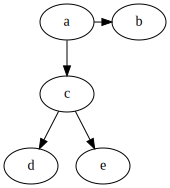

In [79]:
dot

In [87]:
def plot_tree(tree, show_c=True):
    """takes in tree object & creates graphviz"""
    root = tree.get_root()
    
    dot = Digraph(comment="tree")
    dot.attr(rank='min')
    # Create the nodes
    for n in tree.node_list:
        # if not leaf node, only show operation
        if n.num_children > 0:
            if show_c:
                if n.coeff is not None:
                    dot.node(str(n.index), str(n.coeff)+'\n'+str(n.op))
                else:
                    dot.node(str(n.index), n.op)
            else:
                dot.node(str(n.index), n.op)
        else:
            if n.coeff is not None and n.value is None:
                dot.node(str(n.index), str(n.coeff))
            elif n.coeff is not None and n.value is not None:
                dot.node(str(n.index), str(n.coeff)+'*'+str(n.value))
            elif n.coeff is None and n.value is not None:
                dot.node(str(n.index), str(n.value))
    
    # Create digraph edges between nodes
    for n in tree.node_list:
        if n.num_children > 0:
            if n.left is not None:
                dot.edge(str(n.index), str(n.left.index))
            if n.right is not None:
                dot.edge(str(n.index), str(n.right.index))
    
    return dot
                
    

In [92]:
j = plot_tree(a)

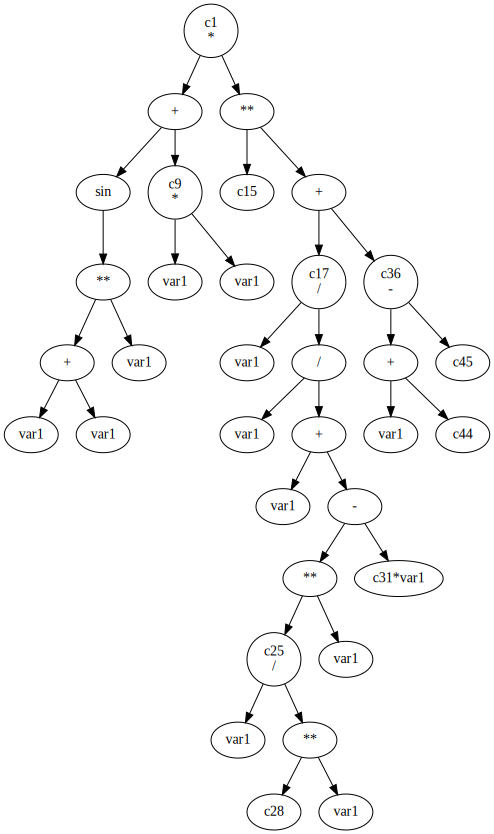

In [93]:
j